<a href="https://colab.research.google.com/github/Ruthra03/Sine-interpolation/blob/main/Linear_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
def generate_angles(num_points):
    return np.linspace(0, np.pi/2, num_points) # Generate angles

In [3]:
def calculate_sin(angles):
    return np.sin(angles)

In [4]:
def slope_of_line(x1, x2, y1, y2):
    return (y2 - y1) / (x2 - x1)

def error_point(x1, x2, m_line): # Find the point x where cos(x) = slope of the line
    def equation(x):
        return np.cos(x) - m_line
    return opt.root_scalar(equation, bracket=[x1, x2]).root

def interpolation_error(angles, sin_values):
    errors = []
    max_error = 0
    for i in range(len(angles) - 1):
        x1, x2 = angles[i], angles[i + 1]
        y1, y2 = sin_values[i], sin_values[i + 1]

        m_line = slope_of_line(x1, x2, y1, y2) # Slope on the straight line

        critical_point = error_point(x1, x2, m_line) # Find the point where slope of the line and slope of the sin(x) are equal

        interpolated_value = y1 + (y2 - y1) / (x2 - x1) * (critical_point - x1) # Interpolated value at the critical point

        actual_value = np.sin(critical_point) # Actual sin(x) value at the critical point

        error = np.abs(actual_value - interpolated_value)  # Calculate the error
        if error > max_error:
            max_error = error

        errors.append(error)
    errors.append(0)

    return max_error, np.array(errors)

In [5]:
def sin_linear_interpolation(tolerance, max_iterations=100):
    num_points = 10
    angles = generate_angles(num_points) # Generate initial angles
    y = calculate_sin(angles) # Calculate sin values

    for iteration in range(max_iterations):
        angles = generate_angles(num_points)
        sin_values = calculate_sin(angles)
        max_error, errors = interpolation_error(angles, sin_values) # Calculate the errror

        error_ratio = max_error / tolerance

        if error_ratio > 1: # If the error ratio greater than 1 - increase the num_points
            num_points = int(num_points * (1 + error_ratio))
        elif error_ratio < 0.5:
            num_points = max(10, int(num_points * (0.5 + error_ratio)))
        else:
            break

    return angles, sin_values, num_points

In [10]:
def refine_angles(angles, sin_values, tolerance):
    new_angles = np.copy(angles)  # Create a copy of theta to modify
    new_sine = np.copy(sin_values)          # Copy y as well for calculations

    i = 1
    while i < len(new_angles) - 1:  # Iterate over all points except the first and last
        temp_angles = np.delete(new_angles, i)
        temp_sine = np.sin(temp_angles)

        max_error, errors = interpolation_error(temp_angles, temp_sine) # Interpolation error for the modified theta

        if max_error <= tolerance: # If the max error is within tolerance, remove the point permanently
            new_angles = temp_angles
            new_sine = temp_sine
        else: # If the error exceeds tolerance, move to the next point
            i += 1

    return new_angles, new_sine

In [11]:
tolerance = 0.001
final_angles, final_sine, final_num_points = sin_linear_interpolation(tolerance)
final_angles, final_sine

(array([0.        , 0.06544985, 0.13089969, 0.19634954, 0.26179939,
        0.32724923, 0.39269908, 0.45814893, 0.52359878, 0.58904862,
        0.65449847, 0.71994832, 0.78539816, 0.85084801, 0.91629786,
        0.9817477 , 1.04719755, 1.1126474 , 1.17809725, 1.24354709,
        1.30899694, 1.37444679, 1.43989663, 1.50534648, 1.57079633]),
 array([0.        , 0.06540313, 0.13052619, 0.19509032, 0.25881905,
        0.32143947, 0.38268343, 0.44228869, 0.5       , 0.55557023,
        0.60876143, 0.65934582, 0.70710678, 0.75183981, 0.79335334,
        0.83146961, 0.8660254 , 0.89687274, 0.92387953, 0.94693013,
        0.96592583, 0.98078528, 0.99144486, 0.99785892, 1.        ]))

In [12]:
new_angles = generate_angles(final_num_points)
new_sine = calculate_sin(new_angles)

In [13]:
refined_angles, refined_sine = refine_angles(new_angles, new_sine, tolerance)
refined_angles, refined_sine

(array([0.        , 0.19634954, 0.32724923, 0.45814893, 0.52359878,
        0.58904862, 0.65449847, 0.71994832, 0.78539816, 0.85084801,
        0.91629786, 0.9817477 , 1.04719755, 1.1126474 , 1.17809725,
        1.24354709, 1.30899694, 1.37444679, 1.43989663, 1.50534648,
        1.57079633]),
 array([0.        , 0.19509032, 0.32143947, 0.44228869, 0.5       ,
        0.55557023, 0.60876143, 0.65934582, 0.70710678, 0.75183981,
        0.79335334, 0.83146961, 0.8660254 , 0.89687274, 0.92387953,
        0.94693013, 0.96592583, 0.98078528, 0.99144486, 0.99785892,
        1.        ]))

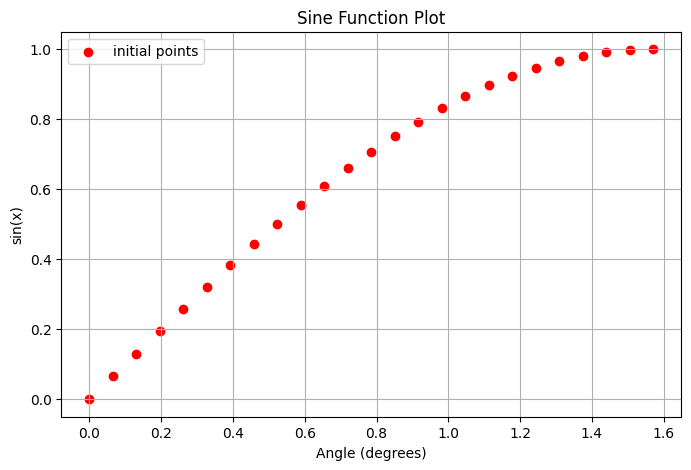

In [14]:
# Plot the angles vs sin(angles)
plt.figure(figsize=(8, 5))
plt.scatter(final_angles, final_sine, color = 'red', label='initial points')

# Add labels and title
plt.title('Sine Function Plot')
plt.xlabel('Angle (degrees)')
plt.ylabel('sin(x)')

plt.grid(True)
plt.legend()

# Display the plot
plt.show()

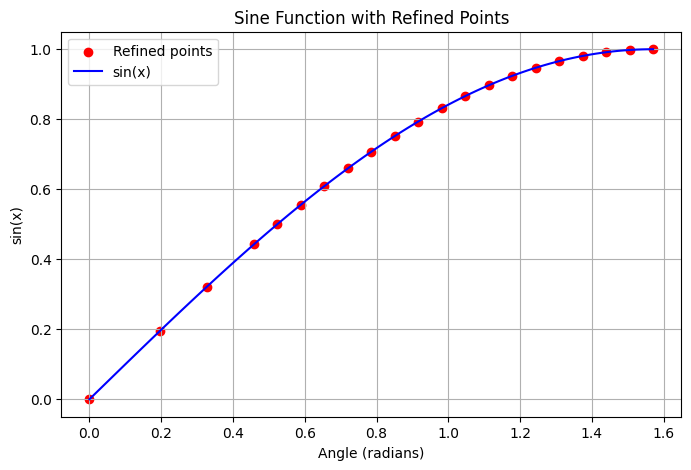

In [15]:
# Plot the angles vs sin(angles)
plt.figure(figsize=(8, 5))

plt.scatter(refined_angles, refined_sine, color='red', label='Refined points') # Plot the refined points as a scatter plot

# Generate sine wave
angles = np.linspace(0, np.pi / 2, 100)  # From 0 to 90 degrees in radians
sin_values = np.sin(angles)

# Plot the sine wave
plt.plot(angles, sin_values, color='blue', label='sin(x)')

# Add labels and title
plt.title('Sine Function with Refined Points')
plt.xlabel('Angle (radians)')
plt.ylabel('sin(x)')

# Add a grid for better readability
plt.grid(True)
plt.legend()

# Display the plot
plt.show()
